In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import mglearn

In [11]:
# Some plot functions

# Dicision Tree Plot function
#
def plot_decision_tree(tree, this_feature_names, target_names):
    from sklearn.tree import export_graphviz
    import graphviz as gv
    
    export_graphviz(tree, out_file="tree.dot", class_names=target_names,
        feature_names=this_feature_names, impurity=False, filled=True)

    # visulize the tree 
    with open("tree.dot") as f:
        dot_graph = f.read()
        plt_source=gv.Source(dot_graph)
        display(plt_source)
        
#
# Feature Importance Plot function
#
def plot_feature_importances(tree, this_feature_names):
    n_features = np.size(this_feature_names)
    plt.figure()
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), this_feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.subplots_adjust(left=0.35)
    plt.show()
    
#
# Decision Region plot function
#
def plot_decision_region(tree, X, y, this_title, this_xlabel, this_ylabel, this_legend):
    
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        this_xticks = np.arange(x_min+0.5,x_max-0.5, 1)
        this_yticks = np.arange(y_min+0.5,y_max-0.5, 1)
    
        plt.figure()
        mglearn.plots.plot_tree_partition(X, y, tree)
        
        plt.title(this_title)
        plt.xlabel(this_xlabel)
        plt.ylabel(this_ylabel)
        plt.legend(this_legend)
        plt.xticks(this_xticks)
        plt.yticks(this_yticks)
    
#
#  Tree Partition Plot function:  mglearn.plots.plot_tree_partition(X, y, tree)
#

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


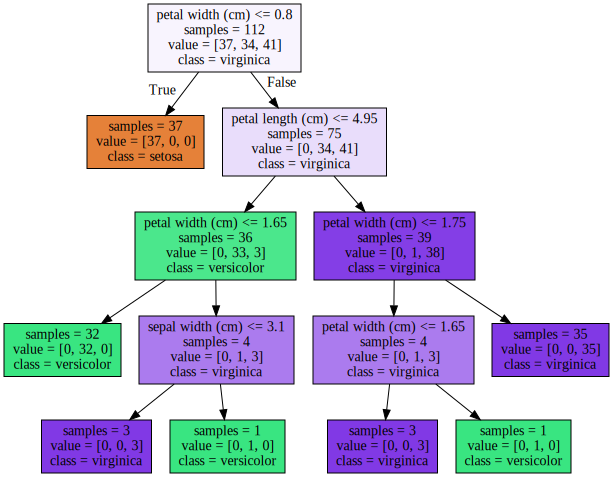

In [12]:
# Problem 1: 
# Load Iris dataset
# Import decisionj tree classifier
# Split data into training data and test data and use random_state = 0
# Fit the model with random_state = 0 and print out training score and test score, what is your concern on the result?
# Plot the decision tree structure
# Return the model classifier as an output
#

def problem1_solution():
    from sklearn.datasets import load_iris
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    iris = load_iris()

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
    clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    plot_decision_tree(clf, iris.feature_names, iris.target_names)
    return clf
    
clf = problem1_solution()


Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


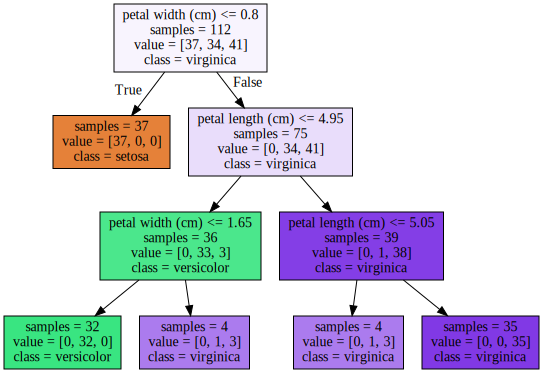

In [13]:
# Problem 2:
# Use the same dataset but fit the model with max_depth=3, and random_state = 0
# Print out training score and test score again
# Why we want to reduce the tree level? what's the terminology for this approach?
# Return the model classifier as an output
#
def problem2_solution():
    from sklearn.datasets import load_iris
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    iris = load_iris()

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
    clf = DecisionTreeClassifier(max_depth = 3, random_state = 0).fit(X_train, y_train)
    
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
         .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on test set: {:.2f}'
         .format(clf.score(X_test, y_test)))
    plot_decision_tree(clf, iris.feature_names, iris.target_names)
    return clf
    
clf2 = problem2_solution()

Feature importances: [0.         0.02014872 0.39927524 0.58057605]


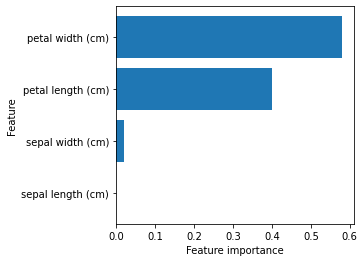

In [14]:
# Problem 3:
# Calculate and print out the feature importance in Problem 1 (with random_state = 0 )
# plot out the feature importance
#

def problem3_solution():
    from sklearn.datasets import load_iris
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    iris = load_iris()

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
        
    print('Feature importances: {}'.format(clf.feature_importances_))
    plot_feature_importances(clf, iris.feature_names)
    
problem3_solution()


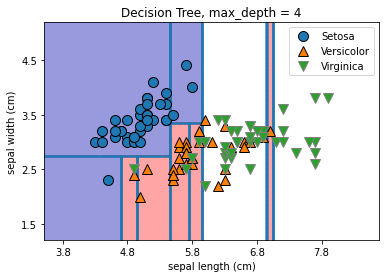

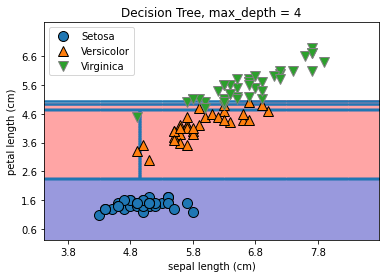

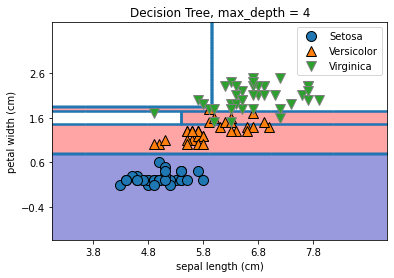

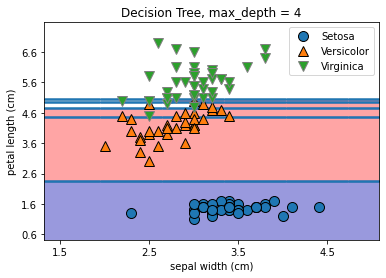

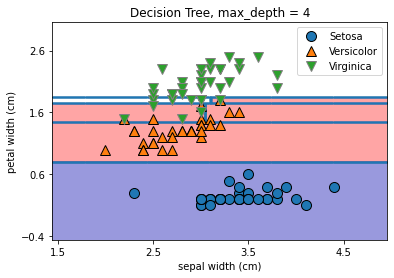

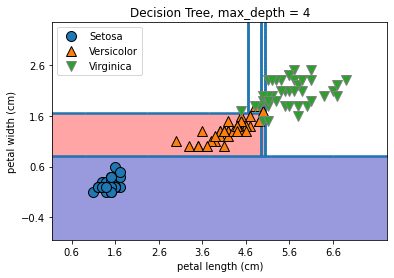

In [15]:
# Problem 4:
# Use the same dataset and the same train-test data split as in Problem 1
# For a decision tree classifier for each pair of featuress with a given max_depth (=4) and random_state = 0
# plot out the tree partion for each pair of features
# 
def problem4_solution(tree_max_depth, this_random_state):
    
    from sklearn.datasets import load_iris
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split

    iris = load_iris()

    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
    
    pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

    # for pair, axis in zip(pair_list, subaxes):
    for pair in pair_list:
        X = X_train[:, pair]
        y = y_train
    
        clf = DecisionTreeClassifier(max_depth=tree_max_depth, random_state = this_random_state).fit(X, y)
        title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
        xlabel = iris.feature_names[pair[0]]
        ylabel = iris.feature_names[pair[1]]
        legend = ['Setosa','Versicolor','Virginica']
        
        plot_decision_region(clf, X, y, title, xlabel, ylabel, legend)
    

problem4_solution(4, 0)


In [ ]:
#@title
